In [14]:
# univariate lstm example
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [3]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [4]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [6]:
print(X),print(y),print(X.shape)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]
(6, 3)


(None, None, None)

In [7]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [8]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 11s 11s/step - loss: 37944.7500
Epoch 2/300
1/1 [==============================] - 0s 19ms/step - loss: 36881.5117
Epoch 3/300
1/1 [==============================] - 0s 21ms/step - loss: 35695.3398
Epoch 4/300
1/1 [==============================] - 0s 21ms/step - loss: 34537.7539
Epoch 5/300
1/1 [==============================] - 0s 21ms/step - loss: 33426.6992
Epoch 6/300
1/1 [==============================] - 0s 21ms/step - loss: 32530.3027
Epoch 7/300
1/1 [==============================] - 0s 24ms/step - loss: 31937.0625
Epoch 8/300
1/1 [==============================] - 0s 23ms/step - loss: 31516.5957
Epoch 9/300
1/1 [==============================] - 0s 23ms/step - loss: 31164.8223
Epoch 10/300
1/1 [==============================] - 0s 23ms/step - loss: 30825.7676
Epoch 11/300
1/1 [==============================] - 0s 22ms/step - loss: 30462.1953
Epoch 12/300
1/1 [==============================] - 0s 23ms/step - loss: 30044.4766
E

In [11]:
x_input = array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1


[224.9122]
1 day input [196.         210.         224.91220093]
1 day output [[235.68605]]
2 day input [210.         224.91220093 235.68605042]
2 day output [[250.19594]]
3 day input [224.9122  235.68605 250.19594]
3 day output [[264.81628]]
4 day input [235.68605 250.19594 264.81628]
4 day output [[277.85382]]
5 day input [250.19594 264.81628 277.85382]
5 day output [[293.39514]]
6 day input [264.81628 277.85382 293.39514]
6 day output [[308.9251]]
7 day input [277.85382 293.39514 308.9251 ]
7 day output [[324.3376]]
8 day input [293.39514 308.9251  324.3376 ]
8 day output [[341.42337]]
9 day input [308.9251  324.3376  341.42337]
9 day output [[358.75107]]


In [12]:
print(lst_output)

[224.9122, 235.68605, 250.19594, 264.81628, 277.85382, 293.39514, 308.9251, 324.3376, 341.42337, 358.75107]


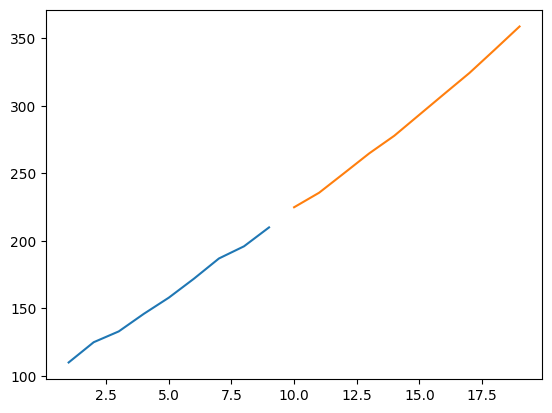

In [15]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)